In [1]:
pip install torch torchvision torchaudio torch-geometric torch-sparse torch-scatter matplotlib numpy scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.8 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [2]:
!pip install torch-geometric \
  torch-sparse \
  torch-scatter \
  torch-cluster \
  -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html

Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 80, in main
    return command.main(cmd_args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 99, in main
    with self.main_context():
  File "/usr/lib/python3.10/contextlib.py", line 142, in __exit__
    next(self.gen)
  Fi

In [3]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.9.0+cu111.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.9.0+cu111.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  ERROR: Operation cancelled by user


In [6]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.1+cu118.html



Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 64.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 28.6 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'torch_geometric'

In [8]:
pip install torch-geometric -f https://data.pyg.org/whl/torch-2.0.1+cu118.html


Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)


In [9]:
# utils/data_preparation.py
import torch
from torch_geometric.datasets import Planetoid

def load_data(dataset_name="Cora"):
    dataset = Planetoid(root="./data", name=dataset_name)
    return dataset


/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


In [10]:
# models/gnn_model.py
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


In [13]:
# train.py
import torch
import torch.nn.functional as F
from torch_geometric.data import DataLoader

def train():
    dataset = load_data()
    data = dataset[0]
    model = GNN(input_dim=dataset.num_node_features, hidden_dim=16, output_dim=dataset.num_classes)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

    model.train()
    for epoch in range(200):
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    return model, data

def test(model, data):
    model.eval()
    with torch.no_grad():
        out = model(data)
        pred = out.argmax(dim=1)
        correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
        acc = int(correct) / int(data.test_mask.sum())
        print(f"Test Accuracy: {acc:.4f}")

if __name__ == "__main__":
    model, data = train()
    test(model, data)


Processing...
Done!


Epoch 0, Loss: 1.949245572090149
Epoch 10, Loss: 0.6723061800003052
Epoch 20, Loss: 0.13194169104099274
Epoch 30, Loss: 0.0334412045776844
Epoch 40, Loss: 0.01707952842116356
Epoch 50, Loss: 0.01501965057104826
Epoch 60, Loss: 0.0165148563683033
Epoch 70, Loss: 0.018229899927973747
Epoch 80, Loss: 0.01866094022989273
Epoch 90, Loss: 0.01796155609190464
Epoch 100, Loss: 0.016833633184432983
Epoch 110, Loss: 0.01577969267964363
Epoch 120, Loss: 0.014913867227733135
Epoch 130, Loss: 0.014184554107487202
Epoch 140, Loss: 0.013547801412642002
Epoch 150, Loss: 0.012978103943169117
Epoch 160, Loss: 0.012467492371797562
Epoch 170, Loss: 0.012007704935967922
Epoch 180, Loss: 0.011593950912356377
Epoch 190, Loss: 0.011221485212445259
Test Accuracy: 0.8110


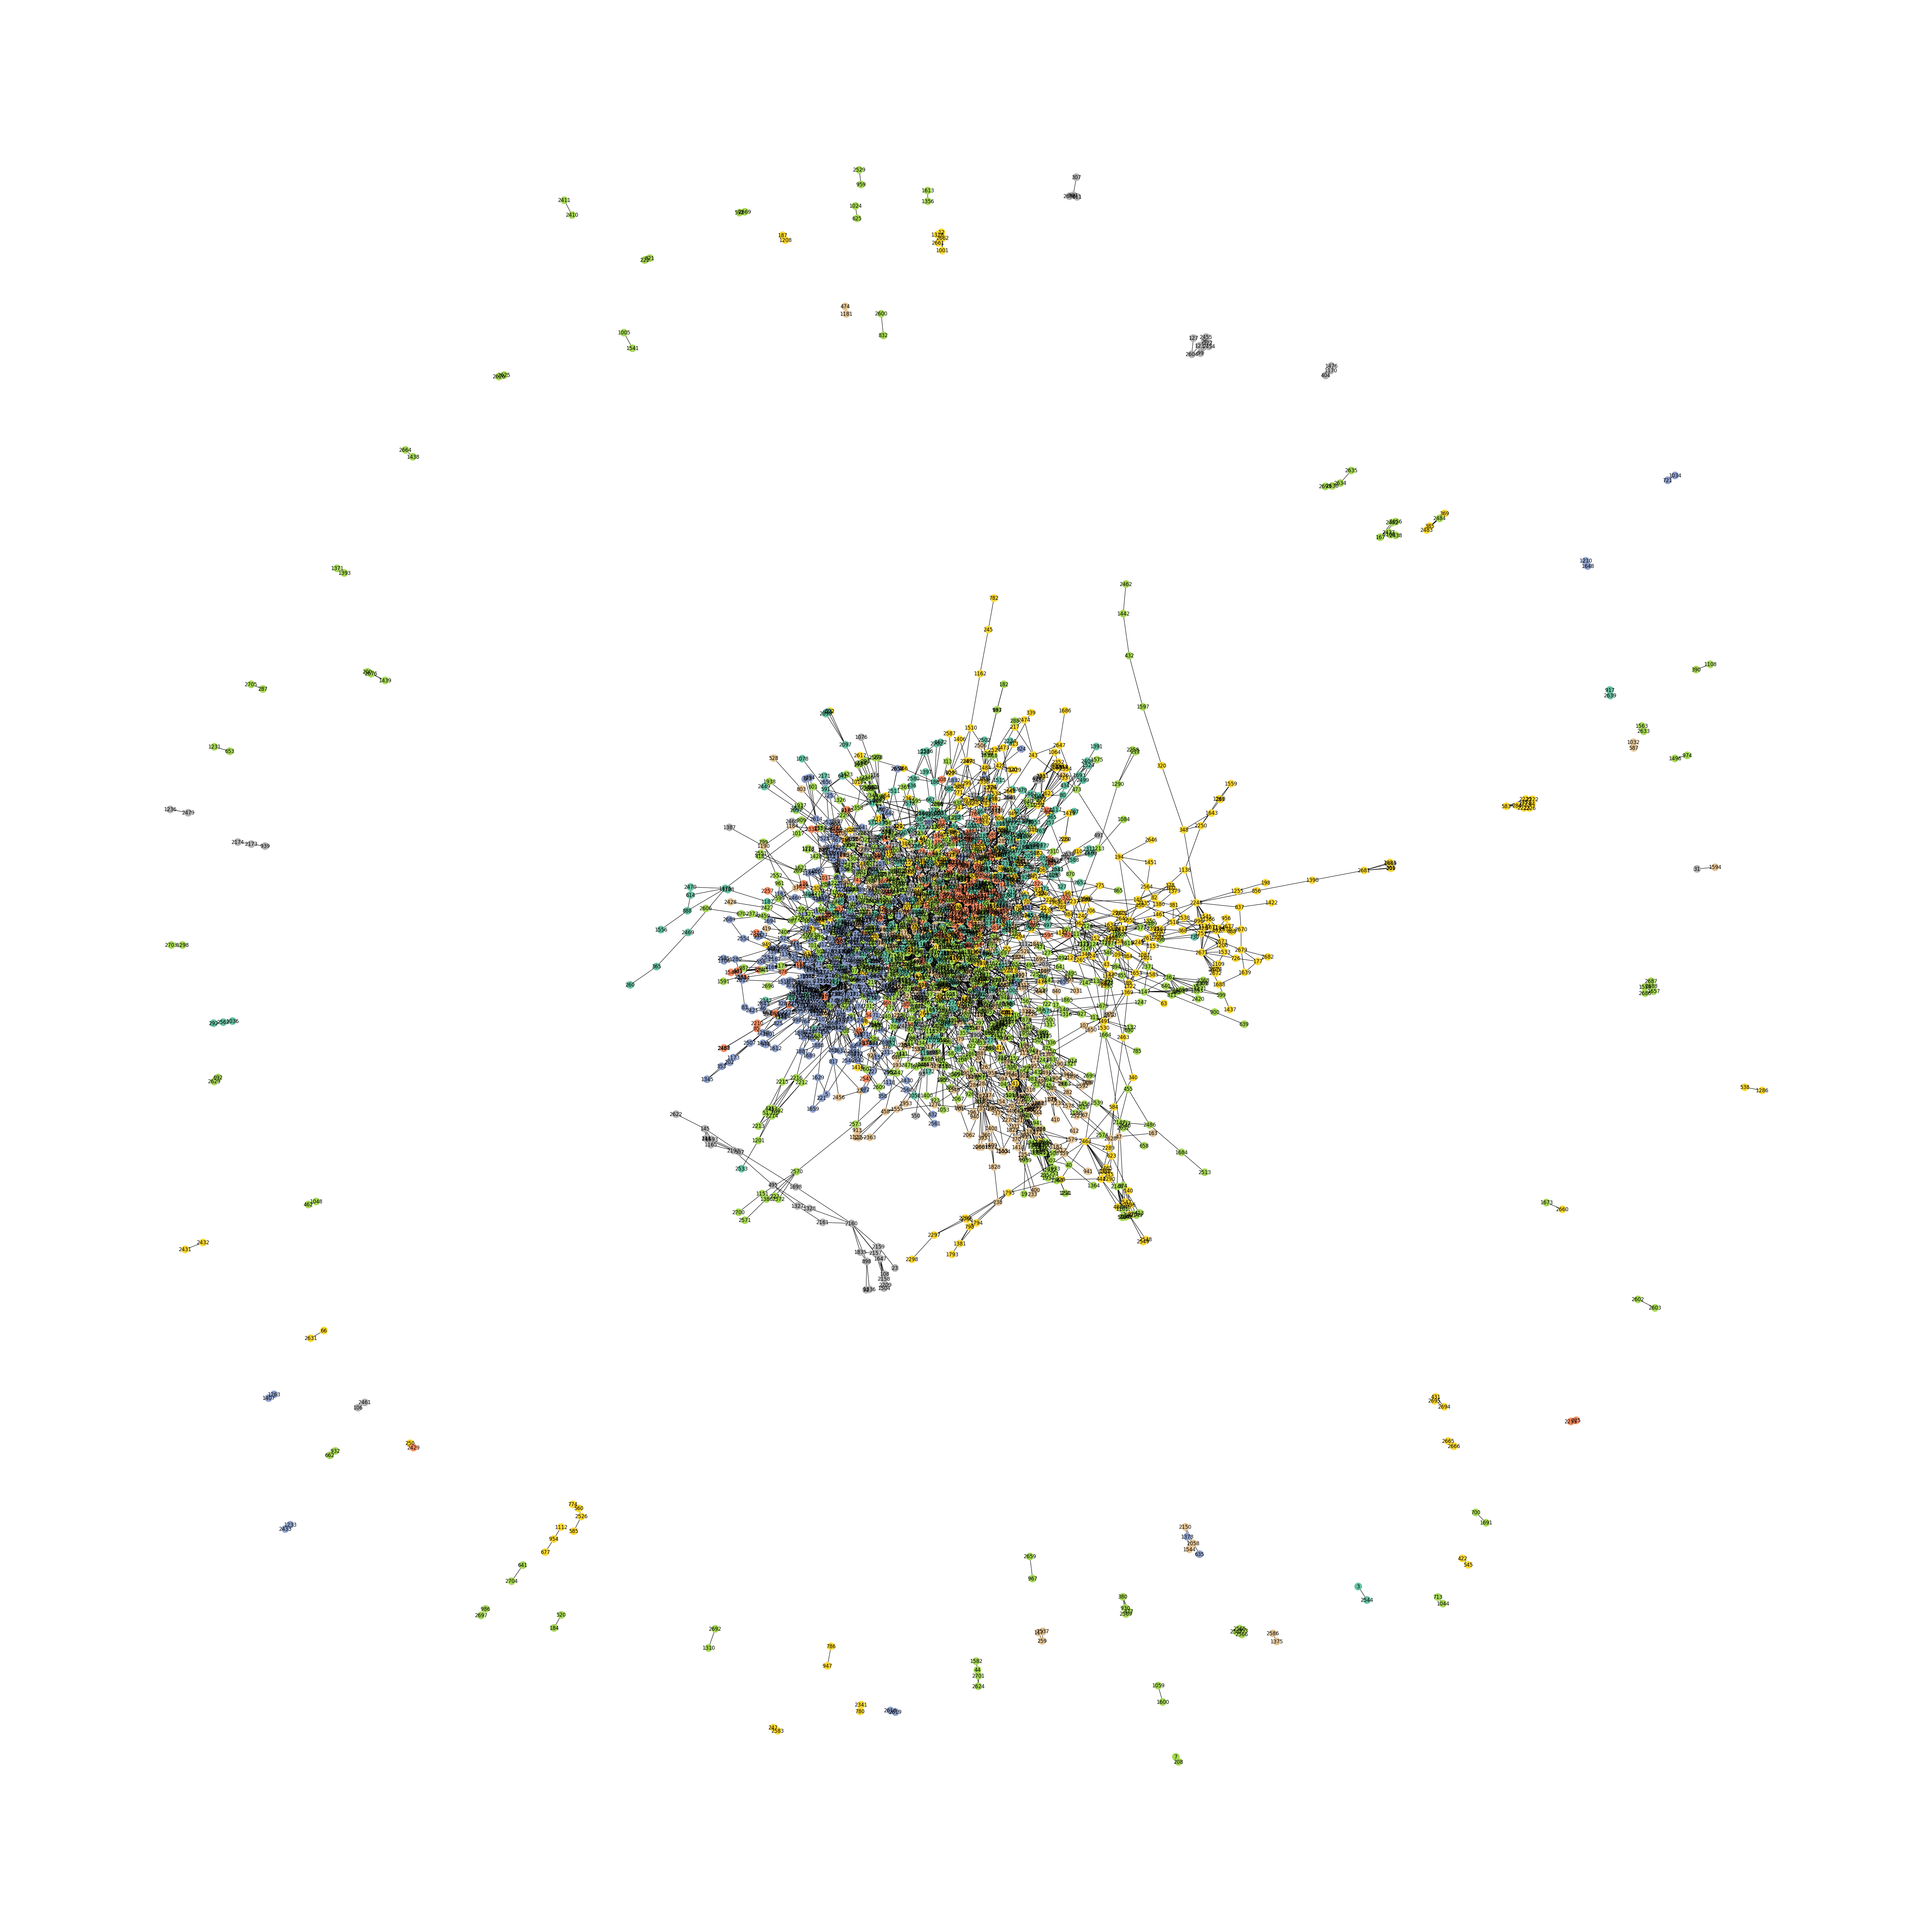

In [15]:
# visualize.py
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx


def visualize(data):
    G = to_networkx(data, to_undirected=True)
    plt.figure(figsize=(64, 64))
    nx.draw(G, with_labels=True, node_color=data.y.numpy(), cmap=plt.get_cmap("Set2"))
    plt.show()

if __name__ == "__main__":
    dataset = load_data()
    data = dataset[0]
    visualize(data)
